# Analysis

## Three Observations:
    *There is a clear correlation between temperature and latitude. Given that the analysis was done in December, the cities with northern latitudes have colder temperatures, whereas cities with southern latitudes have higher temperature. 
    *No correlation was found between humidity and latitude
    *No correlation was found between cloudiness and latitude
    

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import pytemperature
import itertools

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/Grant/UCSD Bootcamp/cities.csv"

# Range of latitudes and longitudes. Create three buckets of latitudes to ensure samples 
# are representative of the entire world

lat_ranges = [(-90,-30),(-30,30),(30,90)]
lng_range = (-180, 180)

In [3]:
for lat_range in lat_ranges:
    print(lat_range[1])

-30
30
90


In [39]:
# List for holding lat_lngs and cities
lats = []
lngs = []

cities = []

# Create a set of random lat and lng combinations
for lat_range in lat_ranges:
    lats = []
    lngs = []
    lat_range_count=len(cities)
    lats_rnd = np.random.uniform(low=lat_range[0], high=lat_range[1], size=600)
    lngs_rnd= np.random.uniform(low=-180.000, high=180.000, size=600)
    
    lats.append(lats_rnd)
    lngs.append(lngs_rnd)
    lat_lngs=zip(lats[0], lngs[0])
    
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
        if city not in cities:
            cities.append(city)
   
    #This is wrong:
    lat_range_count=len(cities)-lat_range_count
    
    
    print(f"Total cities in latitude range {lat_range}: {lat_range_count}")

print(f"Total cities: {len(cities)}")

Total cities in latitude range (-90, -30): 71
Total cities in latitude range (-30, 30): 335
Total cities in latitude range (30, 90): 288
Total cities: 694


In [43]:
url = "http://api.openweathermap.org/data/2.5/weather?"

In [44]:
name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


In [45]:
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        name.append(weather_json['name'])
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json['wind']['speed'])
        print(f"Processing | {weather_json['name']}")
    
    except KeyError:
        print("City not found. Skipping...")

Processing | Ushuaia
City not found. Skipping...
Processing | Cape Town
Processing | Busselton
Processing | Northam
Processing | Kruisfontein
City not found. Skipping...
Processing | Saint-Philippe
Processing | Ancud
Processing | Mataura
Processing | Albany
Processing | Kaitangata
Processing | Bredasdorp
Processing | Hobart
Processing | Port Elizabeth
Processing | Esperance
Processing | Punta Arenas
Processing | Vaini
Processing | Launceston
Processing | Jamestown
Processing | Arraial do Cabo
Processing | East London
Processing | Cidreira
Processing | Mar del Plata
Processing | Geraldton
Processing | Rikitea
Processing | Hermanus
Processing | Mahebourg
Processing | Bluff
Processing | New Norfolk
Processing | Castro
Processing | Richards Bay
Processing | Port Alfred
Processing | Flinders
Processing | Dunedin
Processing | Tuatapere
Processing | Takaka
Processing | Lebu
Processing | Ahipara
Processing | San Vicente
Processing | Souillac
Processing | Luderitz
Processing | Nelson Bay
Proces

Processing | Jiazi
Processing | La Palma
Processing | LOS ALGARROBOS
Processing | Atar
Processing | Salaya
City not found. Skipping...
Processing | Paita
Processing | Saurimo
Processing | Compostela
Processing | Mazamari
Processing | Tacna
Processing | Soyo
Processing | Myanaung
City not found. Skipping...
Processing | Maningrida
Processing | Sao Pedro do Sul
City not found. Skipping...
Processing | Andilamena
City not found. Skipping...
Processing | Constitucion
Processing | Caravelas
Processing | Tera
Processing | Piacabucu
Processing | Tucupita
Processing | Biltine
Processing | Sur
City not found. Skipping...
Processing | Black River
Processing | Sapa
Processing | Phalaborwa
Processing | Kulhudhuffushi
Processing | Port Moresby
Processing | Azare
Processing | Butembo
Processing | Roebourne
Processing | Champerico
Processing | Isoka
Processing | Itarema
Processing | Banepa
Processing | Sechura
Processing | Bubaque
Processing | Axim
Processing | Cockburn Town
Processing | Alekseyevsk


In [59]:
weather_dict = {
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed}

weather_data=pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,75,AR,1576882266,47,-54.81,-68.31,286.15,9.30
1,Cape Town,75,ZA,1576881963,82,-33.93,18.42,293.15,4.60
2,Busselton,0,AU,1576882310,43,-33.64,115.35,294.82,5.76
3,Northam,0,AU,1576882310,52,-31.65,116.67,293.15,9.30
4,Kruisfontein,41,ZA,1576882311,82,-34.00,24.73,291.05,0.64


In [47]:
len(weather_data)

621

In [53]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 9 columns):
City          621 non-null object
Cloudiness    621 non-null int64
Country       621 non-null object
Date          621 non-null int64
Humidity      621 non-null int64
Lat           621 non-null float64
Lng           621 non-null float64
Max Temp      621 non-null float64
Wind Speed    621 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 43.7+ KB


In [60]:
#Convert temperature from Kelvin to F

weather_data['Max Temp']=weather_data['Max Temp'].apply(lambda x: pytemperature.k2f(x))

In [69]:
weather_data.to_csv(output_data_file)

In [70]:
#Latitude vs. Temperature Plot

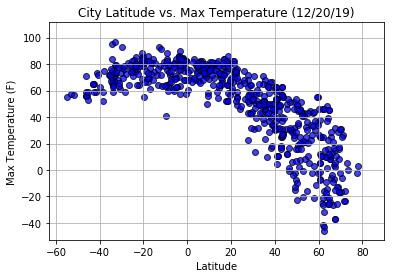

In [98]:
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Max Temperature (12/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim((weather_data['Lat'].min()*1.15), (weather_data['Lat'].max()*1.15))
plt.ylim((weather_data['Max Temp'].min()*1.15), (weather_data['Max Temp'].max()*1.15))

plt.grid(True)
plt.show()

In [91]:
#Latitude vs. Humidity Plot

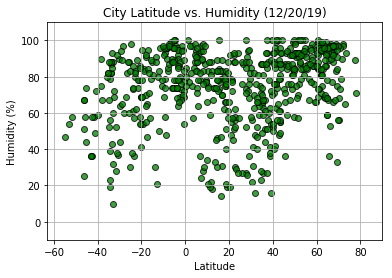

In [105]:
plt.scatter(weather_data['Lat'], weather_data['Humidity'], marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Humidity (12/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim((weather_data['Lat'].min()*1.15), (weather_data['Lat'].max()*1.15))
plt.ylim(-10, 110)

plt.grid(True)
plt.show()

In [103]:
#Latitude vs. Cloudiness Plot

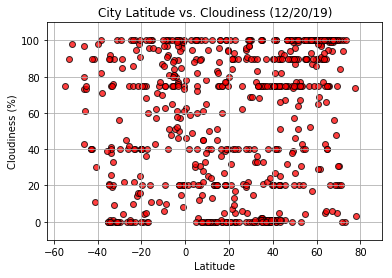

In [106]:
plt.scatter(weather_data['Lat'], weather_data['Cloudiness'], marker='o', facecolors='red', edgecolors='black', alpha=0.75)
plt.title("City Latitude vs. Cloudiness (12/20/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim((weather_data['Lat'].min()*1.15), (weather_data['Lat'].max()*1.15))
plt.ylim(-10, 110)

plt.grid(True)
plt.show()